# Black Friday dataset EDA and Feature Enginnering

## Cleaning the data and preparing for model creating and training

## Problem Statement
A retail company "ABC Private Limited" wants to understand the  purchase behaviour (spcifically, purchase amount) against various products of different products. They have shared purchase summaryof various different customers for selected high volume products from last month. The dataset also contains customer demographics (age, gender, maritial status, city type, and stay in current city), product details (product id, and product category) and Total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different prodcuts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [3]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
n_rows, n_features = df_train.shape
print (f"n_rows: {n_rows}")
print (f"n_fetures: {n_features}")

n_rows: 550068
n_fetures: 12


In [5]:
# Merging train and test to perform data cleaning 
final_df = df_train.append(df_test)

In [6]:
n_rows, n_features = df_train.shape
print (f"n_rows after merging test: {n_rows}")
print (f"n_fetures after merging test: {n_features}")

n_rows after merging test: 550068
n_fetures after merging test: 12


In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
final_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
# USER_ID and PRODUCT_ID is useless, lets drop it
final_df.drop(labels=["User_ID", "Product_ID"], axis=1, inplace=True)

In [10]:
final_df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Fixing categorical features (converting categorical into numerical)

In [11]:
final_df.Gender.unique()

array(['F', 'M'], dtype=object)

There are 2 values as Female and Male

In [12]:
final_df["Gender"] = final_df["Gender"].map({"F": 0, "M": 1})
# final_df["Gender"] = pd.get_dummies(final_df["Gender"], drop_first=1)
# Or you can also do Label encoding

In [13]:
final_df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
# Handling Age group categorical feature
# final_df['Age'] = 
final_df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
final_df["Age"] = final_df["Age"].map({"0-17": 1, "18-25": 2, "26-35": 3, "36-45": 4, "46-50": 5, "51-55": 6, "55+": 7})

In [16]:
final_df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
final_df["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

## One-hot encoding

In [18]:
df_city_cat = pd.get_dummies(final_df["City_Category"], drop_first=True)
final_df = pd.concat([final_df, df_city_cat], axis=1)
final_df.drop(["City_Category"], axis=1, inplace=True)
final_df.head(5)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


### or you can also do label encoding

```python3
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
final_df["City_Category"] = encode.fit_transform(final_df["City_Category"])
final_df.head(5)
```

## Missing values

In [19]:
final_df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [20]:
final_df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

Use MODE (most occuring values) to replace nan values

In [21]:
mode = final_df["Product_Category_2"].mode().values[0]
final_df["Product_Category_2"] = final_df["Product_Category_2"].fillna(mode)
final_df.Product_Category_2.isnull().sum()

0

In [22]:
mode = final_df["Product_Category_1"].mode().values[0]
final_df["Product_Category_1"] = final_df["Product_Category_1"].fillna(mode)
final_df.Product_Category_1.isnull().sum()

0

In [23]:
mode = final_df["Product_Category_3"].mode().values[0]
final_df["Product_Category_3"] = final_df["Product_Category_3"].fillna(mode)
final_df.Product_Category_3.isnull().sum()

0

In [24]:
final_df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [25]:
final_df.shape

(783667, 11)

In [26]:
final_df["Stay_In_Current_City_Years"].unique()
# from sklearn.preprocessing import LabelEncoder

# encode = LabelEncoder()
# final_df["Stay_In_Current_City_Years"] = encode.fit_transform(final_df["Stay_In_Current_City_Years"])
# final_df.head(5)

array(['2', '4+', '3', '1', '0'], dtype=object)

In [27]:
final_df["Stay_In_Current_City_Years"] = final_df["Stay_In_Current_City_Years"].str.replace("+", "")

/tmp/ipykernel_45421/435941993.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_df["Stay_In_Current_City_Years"] = final_df["Stay_In_Current_City_Years"].str.replace("+", "")


In [28]:
final_df.head(10)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
5,1,3,15,3,0,1,2.0,16.0,15227.0,0,0
6,1,5,7,2,1,1,8.0,17.0,19215.0,1,0
7,1,5,7,2,1,1,15.0,16.0,15854.0,1,0
8,1,5,7,2,1,1,16.0,16.0,15686.0,1,0
9,1,3,20,1,1,8,8.0,16.0,7871.0,0,0


In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 61.3+ MB


## Converting features into correct data types

In [30]:
final_df.Stay_In_Current_City_Years = final_df.Stay_In_Current_City_Years.astype(dtype=int)
final_df.B = final_df.B.astype(dtype=int)
final_df.C = final_df.C.astype(dtype=int)

In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 71.7 MB


## Visualization

In [32]:
# sns.pairplot(final_df)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

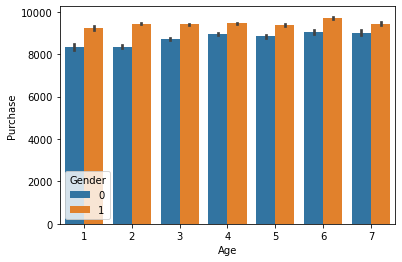

In [33]:
# 0: Female, 1: Male
sns.barplot(x="Age", y="Purchase", data=final_df, hue="Gender")

### Purchasing goods of Men over Woman is high in every age group!

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

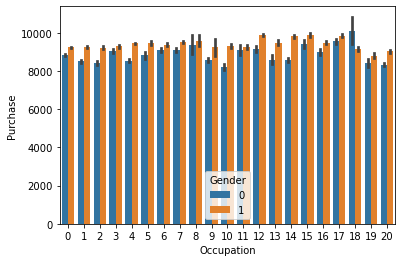

In [34]:
# 0: Female, 1: Male
sns.barplot(x="Occupation", y="Purchase", data=final_df, hue="Gender")

## Regardless of occupation men purchases more than women, except in occupation category 18

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

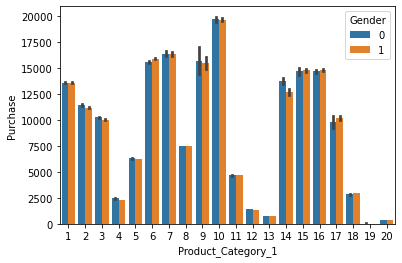

In [35]:
# 0: Female, 1: Male
# Who buys product category 1 more Male / Female
sns.barplot(x="Product_Category_1", y="Purchase", data=final_df, hue="Gender")

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

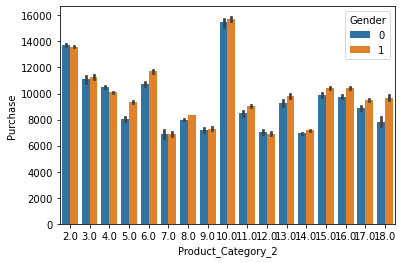

In [36]:
# 0: Female, 1: Male
# Who buys product category 2 more Male / Female
sns.barplot(x="Product_Category_2", y="Purchase", data=final_df, hue="Gender")

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

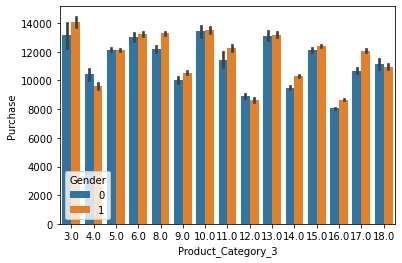

In [37]:
# 0: Female, 1: Male
# Who buys product category 3 more Male / Female
sns.barplot(x="Product_Category_3", y="Purchase", data=final_df, hue="Gender")

In [38]:
# extracting data where Purchase feature has non values
df_train = final_df[~ final_df["Purchase"].isnull()]
df_test = final_df[final_df["Purchase"].isnull()]

In [39]:
print (f"df_train.shape: {df_train.shape}")
print (f"df_test.shape: {df_test.shape}")

df_train.shape: (550068, 11)
df_test.shape: (233599, 11)


In [40]:
y = df_train[["Purchase",]]
copynt (f"y.shape: {y.shape}")
y.head()

y.shape: (550068, 1)


,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0


In [41]:
X = df_train
X.drop(["Purchase", ], inplace=True, axis=1)
print (f"X.shape: {X.shape}")
X.head()

X.shape: (550068, 10)


/home/parth/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [47]:
X_train

array([[ 0.57161057,  1.85014027, -0.16497953, ...,  0.36894971,
         1.17556518, -0.67237178],
       [ 0.57161057, -1.10508507,  0.60178047, ...,  0.36894971,
        -0.85065466,  1.48727241],
       [ 0.57161057, -0.36627874, -0.47168354, ...,  0.73408751,
         1.17556518, -0.67237178],
       ...,
       [-1.74944281, -1.10508507, -1.08509154, ...,  0.36894971,
         1.17556518, -0.67237178],
       [-1.74944281, -1.10508507, -0.62503554, ...,  0.36894971,
         1.17556518, -0.67237178],
       [-1.74944281, -1.10508507, -0.93173954, ...,  0.36894971,
        -0.85065466, -0.67237178]])

In [48]:
X_test

array([[ 0.57640563,  1.84705893,  1.67237598, ...,  0.3681647 ,
        -0.85449443,  1.48980322],
       [-1.73488936,  0.36996495,  0.4471647 , ...,  0.3681647 ,
         1.17028265, -0.67122959],
       [-1.73488936,  0.36996495, -1.23750081, ...,  0.3681647 ,
        -0.85449443, -0.67122959],
       ...,
       [ 0.57640563,  0.36996495,  1.82552739, ...,  0.3681647 ,
        -0.85449443, -0.67122959],
       [ 0.57640563,  0.36996495, -0.16544094, ...,  0.3681647 ,
        -0.85449443, -0.67122959],
       [-1.73488936, -1.84567601,  0.29401329, ...,  0.3681647 ,
        -0.85449443, -0.67122959]])

In [49]:
X_train.shape

(440054, 10)

In [52]:
y_train.shape

(440054, 1)